## BMIS-2542: Data Programming Essentials with Python
##### Katz Graduate School of Business


## Session-5: Regression Practice Exercise

Please fill the **empty code chunks** in this file and submit the same file.

#### Boston Housing Data:

This exercise is based on the `boston.csv` data file available on Canvas.The Boston housing data set provides records of 13 attributes of housing markets around Boston, as well as the median price. </br>
**Complete the given questions as much as you can and upload your notebook to Canvas, at the end of the class**.

<u>Data Set Characteristics</u>:  

Number of Instances: 506 <br>
Number of Attributes: 13 numeric/categorical predictive<br>
Attribute Information (in order):
 * CRIM:     per capita crime rate by town
 * ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS:    proportion of non-retail business acres per town
 * CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * NOX:      nitric oxides concentration (parts per 10 million)
 * RM:       average number of rooms per dwelling
 * AGE:      proportion of owner-occupied units built prior to 1940
 * DIS:      weighted distances to five Boston employment centres
 * RAD:      index of accessibility to radial highways
 * TAX:      full-value property-tax rate per ten thousand dollars
 * PTRATIO:  pupil-teacher ratio by town
 * LSTAT:    % lower status of the population
 * MEDV:     Median value of owner-occupied homes in 1000's
 * Missing Attribute Values: None


In [68]:
# import modules
import pandas as pd
import numpy as np

import statsmodels.api as sm


import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import sklearn.linear_model as sklm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q1. Load the dataset "BostonHousing.csv".

In [84]:
house = pd.read_csv('/content/drive/MyDrive/My Pitt/Python Programming/Hw6/BostonHousing.csv', na_values = "?")


#### NOTE:

<mark>In creating predictive models, split the data into training (60%), validation(20%), and test (20%) sets. For a given model, you will do the training on the training set and evaluate its performance on the validation set.</mark>
> Hint: To split the data into three pieces (60% training, 20% validation, 20% test), first split the data into two pieces (60/40). Then, take the 40% piece of the data and split it further in two pieces (50/50).

The we will fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM.

Q2. Select variable 'CRIM', 'CHAS', 'RM' from the dataset and name it as X. Similarly, select 'MEDV' and name it as Y.

In [149]:
X = house[['CRIM', 'CHAS', 'RM']]
Y = house[['MEDV']]
X = sm.add_constant(X)
X

,const,CRIM,CHAS,RM
0,1.0,0.00632,0,6.575
1,1.0,0.02731,0,6.421
2,1.0,0.02729,0,7.185
3,1.0,0.03237,0,6.998
4,1.0,0.06905,0,7.147
...,...,...,...,...
501,1.0,0.06263,0,6.593
502,1.0,0.04527,0,6.120
503,1.0,0.06076,0,6.976
504,1.0,0.10959,0,6.794


Q3. Split the data into training (60%), validation(20%), and test (20%) sets.

In [150]:
train_X, X_temp, train_Y, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, test_X, Y_val, test_Y = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

Q4. Fit a regresssion model.
> Hint: Add constant in X using add_constant(X) and then Use sm.OLS().

In [151]:
model1 = sm.OLS(train_Y, train_X)
model = model1.fit()

Q5. Show the regression summary (coefficients etc).
> Hint: Use result.summary()

In [152]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     122.2
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           1.17e-51
Time:                        19:31:45   Log-Likelihood:                -989.15
No. Observations:                 303   AIC:                             1986.
Df Residuals:                     299   BIC:                             2001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.6631      3.326     -8.317      0.000     -34.209     -21.117
CRIM          -0.2761      0.047     -5.829      0.000      -0.369      -0.183
CHAS           4.6993      1.492      3.150      0.002       1.764       7.635
RM             8.1014      0.517     15.663      0.000       7.083       9.119
==============================================================================
Omnibus:                       88.464   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.556
Skew:                           1.029   Prob(JB):                    4.63e-120
Kurtosis:                       9.269   Cond. No.                         84.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q6. Predict on the training data variables.
> Hint: Use results.predict(X_train)

In [153]:
predictionY = model.predict(train_X)
predictionY.head(10)

304    30.943227
83     22.288280
248    24.407662
165    20.956076
163    44.465800
199    28.835298
231    32.256473
74     23.135029
311    21.715290
455    23.886246
dtype: float64

In [154]:
type(predictionY)

pandas.core.series.Series

Q7. Calculate RMSE on the training data.
> Hint Use sm.tools.eval_measures.rmse()
Smaller RSME is better

In [155]:
sm.tools.eval_measures.rmse(train_Y['MEDV'], predictionY, axis = 0)

6.331701776906114

Q8. Predict on the validation data.

In [164]:
#constant help X fix X_text, X_val, and have the order in dataset
validate1 = model.predict(X_val)

Q9. Calculate RMSE on validation data

In [161]:
sm.tools.eval_measures.rmse(Y_val['MEDV'] , validate1, axis = 0)

5.633089520758493

Q10. Compute the correlation table for the numerical predictors and visualize as a heatmap.

Use house this whole dataset to do it

<Axes: >

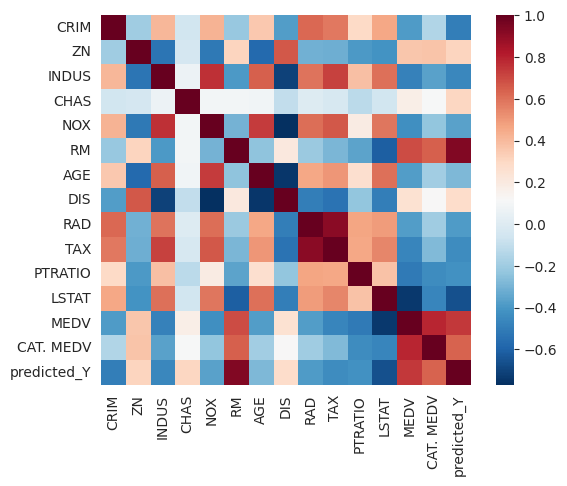

In [170]:
corrmat = house.corr()
sns.heatmap(corrmat, square = True, cmap="RdBu_r")

Q11. Change the above heatmap to show only the correlation with absolute value > 0.6.
> Hint use corrmat[abs(corrmat)>0.6] in heatmap

<Axes: >

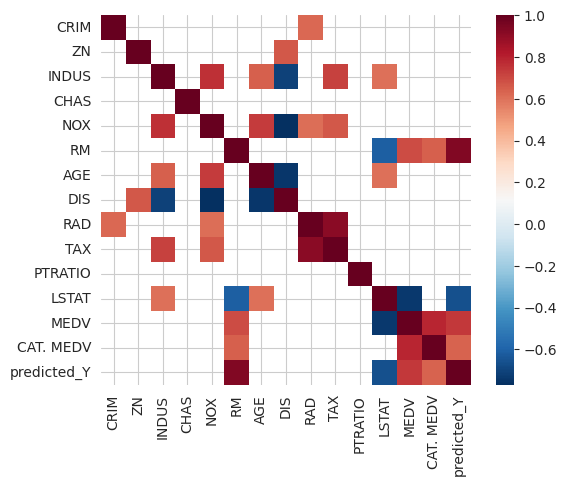

In [172]:
sns.heatmap(corrmat[abs(corrmat)>0.6], square = True, cmap="RdBu_r")

My note:
P-Value close to 0 is good. if just see one model, just use p-value to identify the model. If there are more than one model, value with AIC, RSME, R-square.
High P-value means we can't confidence to say the result.
AIC/BIC: the quality of linear regression
R-square: The higher the better